In [2]:
import os
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for density plot
import os

American75.gml
Amherst41.gml
Auburn71.gml
Baylor93.gml
BC17.gml
Berkeley13.gml
Bingham82.gml
Bowdoin47.gml
Brandeis99.gml
Brown11.gml
BU10.gml
Bucknell39.gml
Cal65.gml
Caltech36.gml
Carnegie49.gml
Colgate88.gml
Columbia2.gml
Cornell5.gml
Dartmouth6.gml
Duke14.gml
Emory27.gml
FSU53.gml
Georgetown15.gml
GWU54.gml
Hamilton46.gml
Harvard1.gml
Haverford76.gml
Howard90.gml
Indiana69.gml
JMU79.gml
Johns Hopkins55.gml
Lehigh96.gml
Maine59.gml
Maryland58.gml
Mich67.gml
Michigan23.gml
Middlebury45.gml
Mississippi66.gml
MIT8.gml
MSU24.gml
MU78.gml
Northeastern19.gml
Northwestern25.gml
Notre Dame57.gml
NYU9.gml
Oberlin44.gml
Oklahoma97.gml
Penn94.gml
Pepperdine86.gml
Princeton12.gml
Reed98.gml
Rice31.gml
Rochester38.gml
Rutgers89.gml
Santa74.gml
Simmons81.gml
Smith60.gml
Stanford3.gml
Swarthmore42.gml
Syracuse56.gml
Temple83.gml
Tennessee95.gml
Texas80.gml
Texas84.gml
Trinity100.gml
Tufts18.gml
Tulane29.gml
UC33.gml
UC61.gml
UC64.gml
UCF52.gml
UChicago30.gml
UCLA26.gml
UConn91.gml
UCSB37.gml
UCSC6

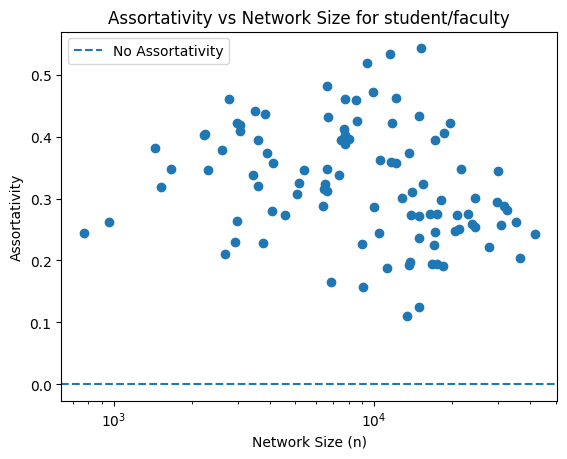

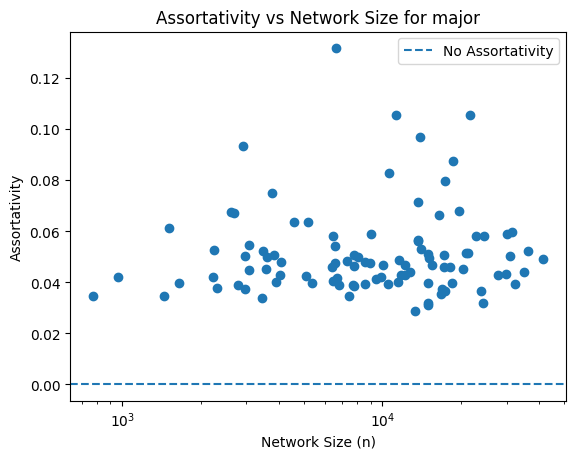

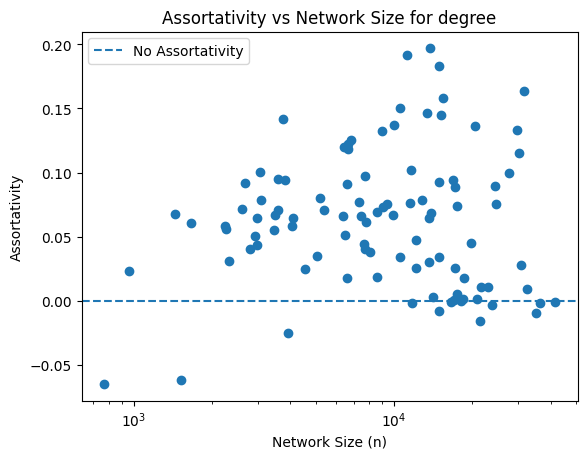

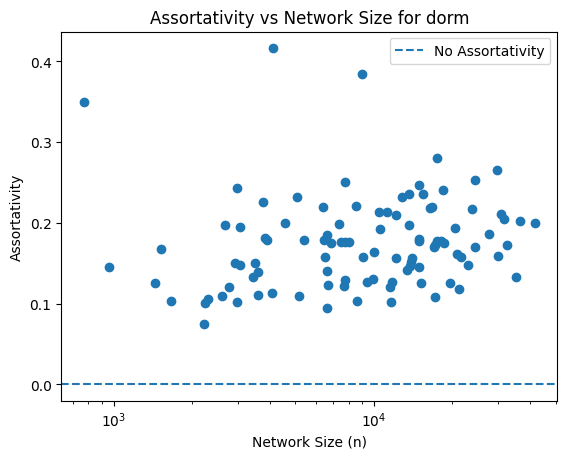

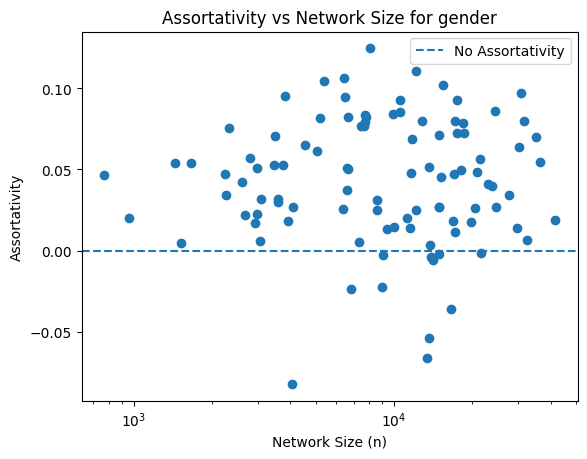

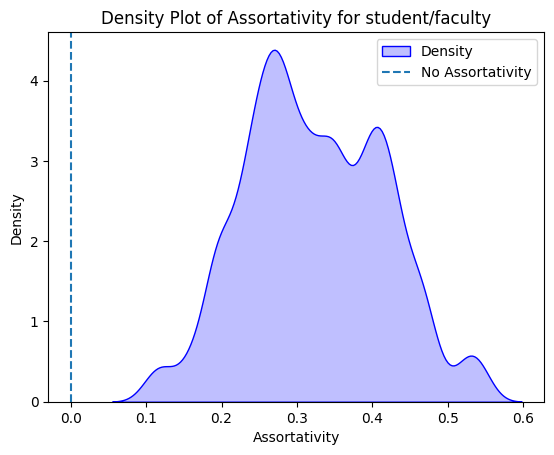

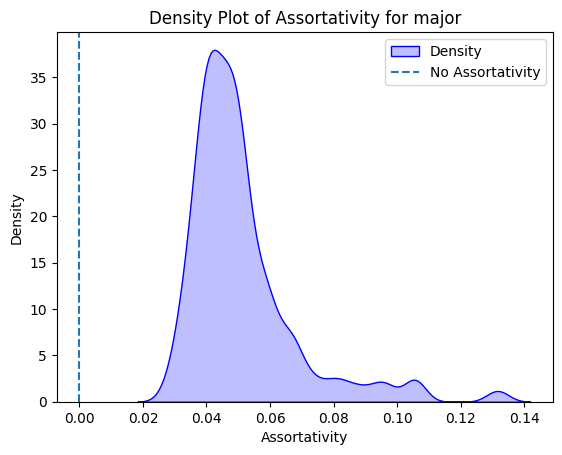

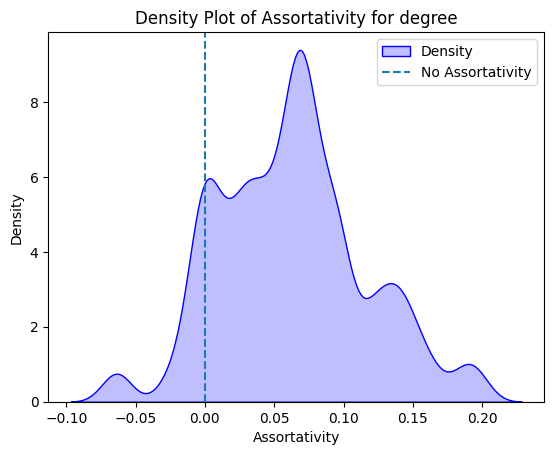

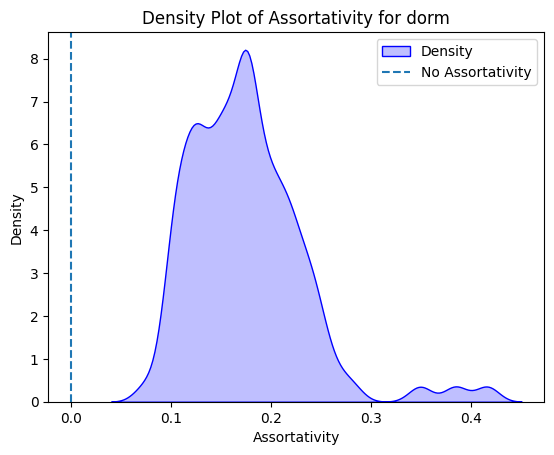

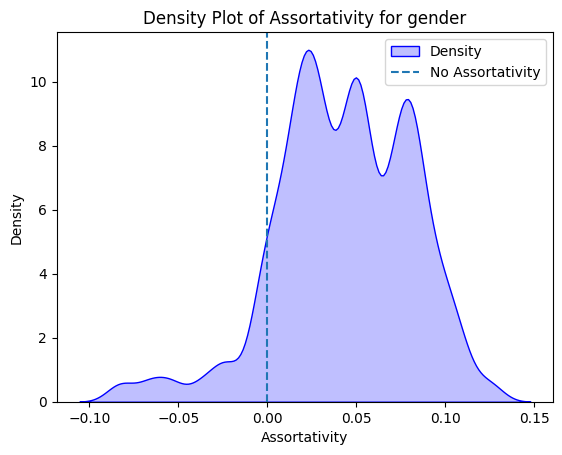

In [3]:
results = {attr: [] for attr in ["student/faculty", "major", "degree", "dorm", "gender"]}
network_sizes = []

# Read data
data_path = "../Data/fb100"

for file in os.listdir(data_path):
    if file.startswith('.'):
        continue

    print(file)
    G = nx.read_gml(f'{data_path}/{file}')  # Ensure the graph is simple
    network_sizes.append(G.number_of_nodes())

    # Compute assortativity for each attribute
    results["student/faculty"].append(nx.attribute_assortativity_coefficient(G, "student_fac"))
    results["major"].append(nx.attribute_assortativity_coefficient(G, "major_index"))
    results["degree"].append(nx.degree_assortativity_coefficient(G)) 
    results["dorm"].append(nx.attribute_assortativity_coefficient(G, "dorm"))
    results["gender"].append(nx.attribute_assortativity_coefficient(G, "gender"))

# Plotting Scatter Plots
for attr, values in results.items():
    plt.figure()
    plt.scatter(network_sizes, values)
    plt.xscale("log")
    plt.axhline(0, linestyle="--", label="No Assortativity")
    plt.title(f"Assortativity vs Network Size for {attr}")
    plt.xlabel("Network Size (n)")
    plt.ylabel("Assortativity")
    plt.legend()
    plt.show()

# Plotting Density Plots
for attr, values in results.items():
    plt.figure()
    sns.kdeplot([v for v in values if v is not None], fill=True, bw_adjust=0.5, color="blue", label="Density")
    plt.axvline(0, linestyle="--", label="No Assortativity")
    plt.title(f"Density Plot of Assortativity for {attr}")
    plt.xlabel("Assortativity")
    plt.ylabel("Density")
    plt.legend()
    plt.show()
